Linear Regression Model From Scratch
(No Sklearn)

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import random 
import pickle

Main Ideas we need to cover:
1) Use least-squares to fit a line to the data
2) Calculate R^2
3) Calculate a p-value for R^2

In [274]:
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2025-01-01')
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582909  72.621646  70.876075  71.127866  118387200
2020-01-07  72.241539  72.849216  72.021223  72.592586  108872000
2020-01-08  73.403648  73.706279  71.943759  71.943759  132079200


In [275]:
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
print("Simplified Columns:", data.columns)

Simplified Columns: Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL'], dtype='object')


In [276]:
data['Returns_AAPL'] = data['Close_AAPL'].pct_change()
data.dropna(inplace=True)
print(data)

            Close_AAPL   High_AAPL    Low_AAPL   Open_AAPL  Volume_AAPL  \
Date                                                                      
2020-01-03   72.009125   72.771752   71.783969   71.941336    146322800   
2020-01-06   72.582909   72.621646   70.876075   71.127866    118387200   
2020-01-07   72.241539   72.849216   72.021223   72.592586    108872000   
2020-01-08   73.403648   73.706279   71.943759   71.943759    132079200   
2020-01-09   74.962807   75.156487   74.132390   74.384173    170108400   
...                ...         ...         ...         ...          ...   
2024-12-24  257.916443  257.926411  255.009620  255.209412     23234700   
2024-12-26  258.735504  259.814335  257.347047  257.906429     27237100   
2024-12-27  255.309296  258.415896  252.782075  257.546826     42355300   
2024-12-30  251.923019  253.221595  250.474615  251.952985     35557500   
2024-12-31  250.144974  253.001833  249.156056  252.162760     39480700   

            Returns_AAPL

In [277]:
X= data[['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL']]
y = data['Close_AAPL']
print(X)
print(y)

             Open_AAPL   High_AAPL    Low_AAPL  Volume_AAPL
Date                                                       
2020-01-03   71.941336   72.771752   71.783969    146322800
2020-01-06   71.127866   72.621646   70.876075    118387200
2020-01-07   72.592586   72.849216   72.021223    108872000
2020-01-08   71.943759   73.706279   71.943759    132079200
2020-01-09   74.384173   75.156487   74.132390    170108400
...                ...         ...         ...          ...
2024-12-24  255.209412  257.926411  255.009620     23234700
2024-12-26  257.906429  259.814335  257.347047     27237100
2024-12-27  257.546826  258.415896  252.782075     42355300
2024-12-30  251.952985  253.221595  250.474615     35557500
2024-12-31  252.162760  253.001833  249.156056     39480700

[1257 rows x 4 columns]
Date
2020-01-03     72.009125
2020-01-06     72.582909
2020-01-07     72.241539
2020-01-08     73.403648
2020-01-09     74.962807
                 ...    
2024-12-24    257.916443
2024-12-26    2

In [278]:
X = np.array(X)
indices = np.random.permutation(len(X))

In [279]:
train_ratio = 0.8
split_index = int(len(X)*train_ratio)

In [280]:
x_train = X[indices[:split_index]]
x_test = X[indices[split_index:]]
y_train = np.array(y)[indices[:split_index]]
y_test = np.array(y)[indices[split_index:]]

print("x:train:", x_train)
print("x_test:", x_test)
print("y_train:", y_train)
print("y-test:", y_test)

x:train: [[1.08294453e+02 1.09201295e+02 1.05037627e+02 1.90272600e+08]
 [1.51977339e+02 1.54769191e+02 1.51818948e+02 6.81679000e+07]
 [1.79311858e+02 1.79371339e+02 1.75485110e+02 6.03785000e+07]
 ...
 [1.72127235e+02 1.73560470e+02 1.71241418e+02 6.01395000e+07]
 [2.16233261e+02 2.18565419e+02 2.15027307e+02 3.63118000e+07]
 [1.87763406e+02 1.89097120e+02 1.87116467e+02 4.51552000e+07]]
x_test: [[1.82375250e+02 1.84913194e+02 1.82196792e+02 6.54332000e+07]
 [7.73199939e+01 7.84393407e+01 7.71885904e+01 8.07912000e+07]
 [1.31081555e+02 1.31620504e+02 1.30552399e+02 6.02142000e+07]
 ...
 [1.67007641e+02 1.70486770e+02 1.66771778e+02 1.95432700e+08]
 [1.61237389e+02 1.61463717e+02 1.52479292e+02 1.30525300e+08]
 [1.85121355e+02 1.85379125e+02 1.82682556e+02 1.01235600e+08]]
y_train: [106.14923859 152.175354   176.654953   ... 171.93812561 217.50897217
 187.96247864]
y-test: [184.40757751  78.31767273 131.01295471 164.51097107 171.86334229
 190.26054382 140.16914368 128.53553772 189.047

Preprocessing:

PCA (Principal Component Analysis)
1: Standardize.
2: Covariance Matrix.
3. Eigen Decomp.
4. Sort Eigenvalues.
5. transform.

In [281]:
mean = np.mean(x_test, axis=0)
std = np.std(x_test, axis=0)
x_test_standard = (x_test - mean) / std
x_train_standard = (x_train - mean) / std
print(x_test_standard)

[[ 0.64615595  0.66381148  0.68576914 -0.48373711]
 [-1.84967281 -1.85566925 -1.82834252 -0.14705311]
 [-0.57244351 -0.5972484  -0.55070352 -0.59815005]
 ...
 [ 0.28106312  0.32244038  0.31646266  2.36616215]
 [ 0.14397754  0.10892873 -0.02572875  0.94323705]
 [ 0.71139598  0.67483676  0.69739931  0.30113693]]


What this is doing is we're using z-score formula which is 
z = (x-(mean))/std. 

In [282]:
cov_matrix = np.cov(x_test_standard, rowvar=False)
print(cov_matrix)

[[ 1.00398406  1.00328412  1.00330879 -0.62700397]
 [ 1.00328412  1.00398406  1.0031273  -0.61610189]
 [ 1.00330879  1.0031273   1.00398406 -0.63523266]
 [-0.62700397 -0.61610189 -0.63523266  1.00398406]]


We now make a covariance matrix which tells us the magnitude/direction of these standardized values.

Facts about covariance matrixes:
they're nxn symmetric
the diagonal entries are all equal
upper and lower triangular portions are also equal
mainly looking at the sign of the numbers

Negative: One increases / other decreasing (inversely correlated)
Positive: Both increase / decreases (correlated)

In [283]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

Now we're using lin-alg to find the eigenvalues/ eigenvectors which they're "n" sets for the amount of dim the matrix has. 

We're basically finding out how much varience on the data by calculating the eigen stuff.

In [284]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print(sorted_eigenvalues)

[3.48457572e+00 5.30172899e-01 6.30551020e-04 5.57085463e-04]


We then sorted it in increasing order.

In [285]:
m = 2
top_eigenvectors = sorted_eigenvectors[:, :m]
x_test_reduced = np.dot(x_test_standard, top_eigenvectors)
x_train_reduced = np.dot(x_train_standard, top_eigenvectors)

We then reduced to a 1 dimensional array and then we took the dotproduct of the two vectors which results us with new data on a new plane.

Normal Equation (Without Gradient Descent):

In [286]:
X = np.hstack([np.ones((x_train_reduced.shape[0], 1)),x_train_reduced])
w = np.linalg.inv(X.T @ X) @ X.T @ y_train

bias = w[0]
coeff = w[1:]
print("Bias:", bias)
print("Coeff:", coeff)

Bias: 155.31822194401406
Coeff: [22.25482237 -9.69118722]


We used our preprocessed data (1D and normalized) to stack it hstack (horizontal stacking) then inverting it. This means we're reconstructing the original data from our reduced-dimension array.

In [287]:
y_pred = np.dot(x_test_reduced, w[1:]) + w[0]
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.546178517337939


We now found our mean squared error. Is this good compared to our target value (y)?

In [288]:
range_y = np.max(y_train) - np.min(y_train)
std_y = np.std(y_train)

print(f"Range of y: {range_y}")
print(f"Standard Deviation of y: {std_y}")

Range of y: 204.28560638427734
Standard Deviation of y: 41.959527030569014


In [289]:
y_mean = np.mean(y_test)

ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - y_mean) ** 2)

r_squared = 1 - (ss_res / ss_tot)

print("R^2 Score:", r_squared)


R^2 Score: 0.9985628033774665


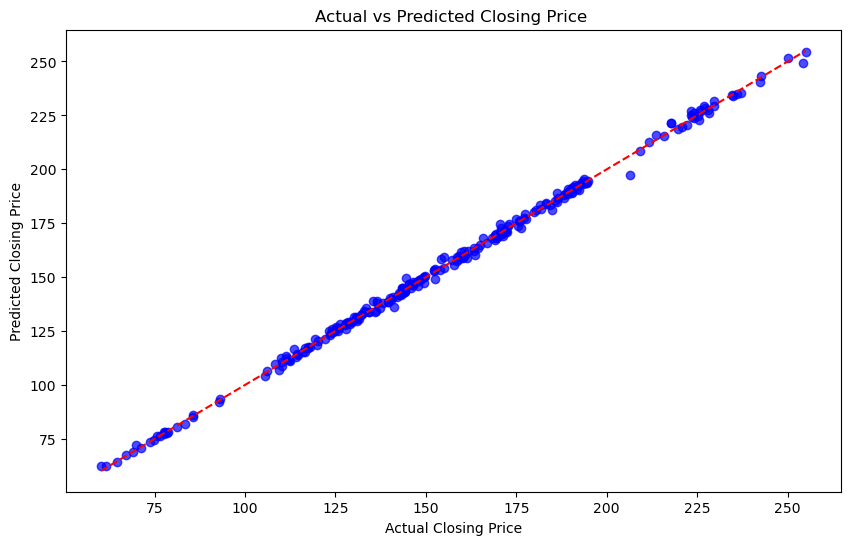

In [290]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',linestyle='--')

plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted Closing Price ')
plt.show()

New Equation (With Gradient Descent & regularization):

In [291]:
w = np.zeros(x_train_reduced.shape[1])
b = 0
LR = 0.01
lambda_l1 = 0.00001
lambda_l2 = 0.00001
n = len(x_train_reduced)
iterations = 1000
for _ in range(iterations):
    y_pred2 = x_train_reduced @ w + b

    dw= (-2/n) * x_train_reduced.T @ (y_train - y_pred2) + lambda_l1 * np.sign(w) + 2 * lambda_l2 * w
    db = (-2/n) * np.sum(y_train - y_pred2)

    w -= LR * dw
    b -= LR * db
print(f"Optimal weights: {w}")
print(f"Optimal biases: {b}")

Optimal weights: [22.25474224 -9.69098875]
Optimal biases: 155.3182096395253


Here we set a random weight and biases and we go through "n" amount of iterations to give us the most optimal weight and bias. 

For Regularization, I expirmented by changing lambda1 and lambda2 and I concluded that when I did 0.01, it underfitted my weights results in huge percentage error. 0.0001 made my error a lot less so I'm sticking with this.

In [292]:
y_test_pred = x_test_reduced @ w + b
test_mse = np.mean((y_test - y_test_pred) ** 2)
print(f"Mean Squared Error using Gradient Descent: {test_mse}")

Mean Squared Error using Gradient Descent: 2.5461784912972507


Let's compare the base mse to the optimized mse.

In [293]:
base_rmse = np.sqrt(mse)
optimized_rmse = np.sqrt(test_mse)

print(f"Baseline RMSE: {base_rmse}")
print(f"Optimized RMSE: {optimized_rmse}")

Baseline RMSE: 1.5956749410008102
Optimized RMSE: 1.5956749328410378


In [294]:
relative_error_base_range = base_rmse / range_y
relative_error_opt_range = optimized_rmse / range_y
relative_error_base_std = base_rmse / std_y
relative_error_opt_std = optimized_rmse / std_y

print(f"Relative Error of Base, Range: {relative_error_base_range}")
print(f"Relative Error of Optimized, Range: {relative_error_opt_range}")
print(f"Relative Error of Base, STDEV: {relative_error_base_std}")
print(f"Relative Error of Optimized, STDEV: {relative_error_opt_std}")

Relative Error of Base, Range: 0.0078110003403725845
Relative Error of Optimized, Range: 0.0078110003004296215
Relative Error of Base, STDEV: 0.03802890675670162
Relative Error of Optimized, STDEV: 0.03802890656223393


In [295]:
percentage_improv = ((mse - test_mse) / mse) * 100
print(f"Percentage Improvement: {percentage_improv:.2f}%")

Percentage Improvement: 0.00%


Evaluation:

In [296]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [297]:
data['Returns_AAPL'] = data['Close_AAPL'].pct_change()
data.dropna(inplace=True)
X2= data[['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL']]
y2 = data['Close_AAPL']

In [298]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train2, y_train2)

LinearRegression()

In [299]:
y_pred2 = model.predict(X_test2)
mse_modeled = mean_squared_error(y_test2, y_pred2)
r2_modeled = r2_score(y_test2, y_pred2)
print(f'Mean Squared Error: {mse_modeled:.2f}')
print(f'R^2 Score: {r2_modeled:.2f}')

Mean Squared Error: 1.01
R^2 Score: 1.00


In [300]:
coefficients = pd.DataFrame(model.coef_, index=X2.columns, columns=['Coefficient'])
print(coefficients)

              Coefficient
Open_AAPL   -6.024007e-01
High_AAPL    8.297779e-01
Low_AAPL     7.722257e-01
Volume_AAPL -7.852900e-10
